# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [235]:
#Import relevant packages and read in the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

#Print first 5 lines of the dataframe and check datatypes and missing values
print(df.head())
print('  ')
print(df.info())
print('  ')

#The info states 130 non-null values, but it's nice to check again to be sure.
print(df.isna().any())



   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
  
temperature    False
gender         False
heart_rate     False
dtype: bool


## Question 1.  Is the distribution of body temperatures normal?




In [236]:
#Get summary statistics
print(df.describe())

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


## Are males and females equally represented?

In [237]:
df.groupby('gender').count()

,temperature,heart_rate
gender,,
F,65,65
M,65,65


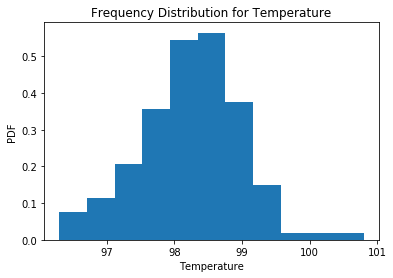

In [238]:
#Compute the number of bins using the square root rule.
n_data = len(df['temperature'])
n_bins = np.sqrt(n_data)

#Convert to a integer
n_bins = int(n_bins)

#Plot the histogram with n_bins number of bins
_ = plt.hist(df['temperature'], bins=n_bins, density=True)
_ = plt.title('Frequency Distribution for Temperature')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('PDF')
plt.show()

The graph looks nearly normal. However, histograms suffer from potential binning bias. I will plot the ECDF to confirm.

In [239]:
#Get mean and standard deviation samples through random selection
mean  =  np.mean(df['temperature'])
std = np.std(df['temperature'])
samples = np.random.normal(mean,std,size=10000)

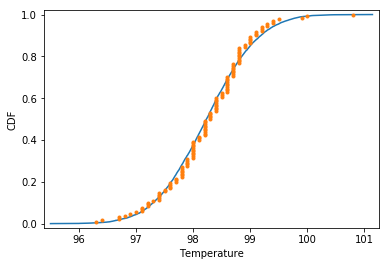

In [240]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Create an ECDF from real data: x, y
x, y = ecdf(df['temperature'])

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(samples)

# Overlay the plots
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
_ = plt.margins(0.02)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
plt.show()

The ECDF confirms that the data can be considered normal for statistical purposes.

Another way to check for normality is with a probability plot which plots the empirical dataset against a theoretical dataset. Here I will try one:

Text(0.5,1,'Probability Plot of Temperature')

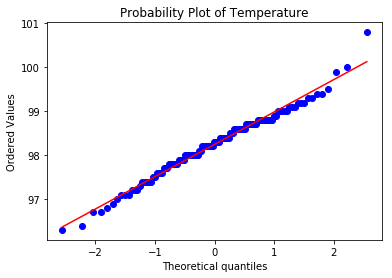

In [241]:
probplt = stats.probplot(df['temperature'], plot=plt)
plt.title('Probability Plot of Temperature')

This also confirms that the data are normal.

## Question 2. Is the sample size large? Are the observations independent?


In [242]:
print('The sample size is:  ', len(df))


The sample size is:   130


In [243]:
#Return counts of the number of male and female

print(df['gender'].value_counts())

F    65
M    65
Name: gender, dtype: int64



The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed. 

This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually n > 30). This sample size is greater than 30 so this meets this condition.

One of the conditions for the central limit theorem is the 10% rule:  Samples should be no more than 10% of the population from which you are sampling. A sample size of 130 is nowhere near 10% of the population of all men and women so this meets this condition.

This means that we can use the normal probability model to quantify uncertainty when making inferences about a population mean based on the sample mean.

Source: http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability12.html

Two observations are **independent** if the occurrence of one observation provides no information about the occurrence of the other observation. This is something that the research design determines, and is difficult to test for after the fact. However, it is reasonable to consider that if there is no correlation (relationship) between observations, and that the observations are normally distributed, they are likely to be independent.

First, I will check that the male temperature and female temperature observations are likely to be independent. Meaning, are both male and female termperature observations distributed normally, with no relationship between them. 

Next, I will check if the variables are independent by doing a jointplot of temperature vs heart rate. 

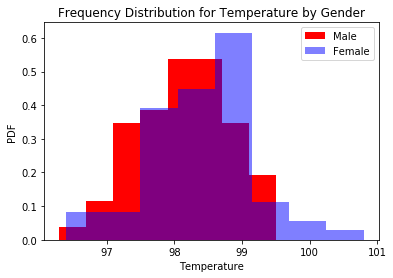

        temperature  heart_rate
gender                         
F         98.393846   74.153846
M         98.104615   73.369231


In [244]:
#Compute the number of bins using the square root rule.
nn_bins = np.sqrt(65)

#Convert to a integer
nn_bins = int(nn_bins)

#Plot the histogram with nn_bins number of bins
_ = plt.hist(df[df['gender']=='M']['temperature'], bins=nn_bins, color = 'red', density = True)
_ = plt.hist(df[df['gender']=='F']['temperature'], bins=nn_bins, color = 'blue', alpha = 0.5, density = True)
_ = plt.title('Frequency Distribution for Temperature by Gender')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('PDF')
_ = plt.legend(('Male', 'Female'), loc='upper right')
plt.show()

print(df.groupby('gender').mean())



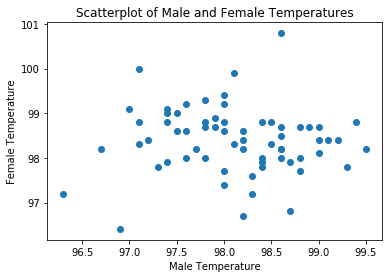

C:\Users\Valery\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


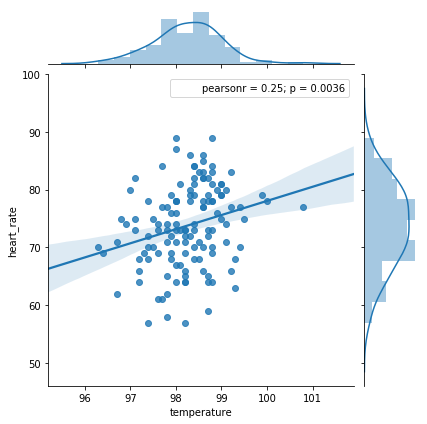

In [245]:
#Scatterplot of male and female temperatures

_ = plt.scatter(df[df['gender']=='M']['temperature'], df[df['gender']=='F']['temperature'])
_ = plt.xlabel('Male Temperature')
_ = plt.ylabel('Female Temperature')
_ = plt.title('Scatterplot of Male and Female Temperatures')

plt.show()

# Generate a joint plot of 'temperature' and 'heart_rate'
_ = sns.jointplot('temperature', 'heart_rate', data=df, kind='reg')

# Display the plot
plt.show()

**CONCLUSION:**  The distributions appear to be normal and are essentially overlapping, apart from more variation in females. Although there are more females with temperatures between 98 and 99. There does not seem to be any relationship between male temperature and female temperature. It is reasonable to consider the observations to be independent.

There is a very weak correlation (pearsonr = 0.25) between temperature and heart rate which suggests that they are somewhat independent.

## Question 3. Is the true population mean really 98.6 degrees F?


Mean Temperature:   98.24923076923078
95% confidence interval = [98.12538462 98.37538462]


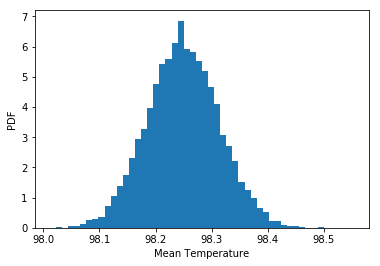

In [246]:
#Use bootstrap techniques to generate many random samples from our data
#and compute confidence intervals.

def bootstrap_replicate_1d(data, func):
    '''This function generates bootstrap replicates of 1d data'''
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    '''Draw bootstrap replicates.'''

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)
conf_int = np.percentile(bs_replicates,[2.5,97.5])

print('Mean Temperature:  ', df['temperature'].mean())
print('95% confidence interval =', conf_int)

#Create a pdf histogram of results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('Mean Temperature')
_ = plt.ylabel('PDF')

**CONCLUSION:** It would appear from this analysis that the true temperature is **NOT** 98.6.

Next, I will test the hypothesis using frequentist methods.

A z-test is used for testing the mean of a population versus a standard with large (n ≥ 30) sample sizes. A t-test is used for testing the mean of one population against a standard or comparing the means of two populations when you have a limited sample size (n < 30). Our sample size is 130 so the z-test is a more appropriate test. 

A one-sample test is more appropriate because we are testing a sample mean against a known value. In this case, the known value is 98.6. 

The null hypothesis is that our sample mean does not differ from 98.6:

H0: μ = 98.6

The alternative hypothesis is that our sample mean is not equal to 98.6 or,
 
H1: μ ≠ 98.6

In [247]:
mew = df['temperature'].mean()
stdev = df['temperature'].std()

known_val = 98.6

z_stat = (mew - known_val) / (stdev/np.sqrt(len(df)))
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print('z-value is:  ', z_stat.round(4))
print('p-value is: ', p_value.round(4))

z-value is:   -5.4548
p-value is:  0.0


**CONCLUSION:**  The p-value is very small, so we can reject the null hypothesis and state that the sample mean is **NOT** equal to 98.6.

Now I will try a one-sample t-test. 

In [248]:
t_test = stats.ttest_1samp(df['temperature'], known_val, axis=0)
t_test

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The results are the same because the sample size is >30. The t-test confirms the z-test, and the bootstrapping technique. 

## Question 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

Here, the sample size is <30, so the t-test would be the correct method to choose. 

Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?


In [249]:
draw_sample = np.random.normal(df['temperature'], 10)

draw_mean = draw_sample.mean()
draw_stdev = draw_sample.std()


z_stat = (draw_mean - known_val) / (draw_stdev/np.sqrt(len(df)))
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

t_test = stats.ttest_1samp(draw_sample, known_val, axis=0)
print(t_test)
print(' ')
print('z-value is:  ', z_stat.round(4))
print('p-value is: ', p_value.round(4))

Ttest_1sampResult(statistic=-0.06436269366461955, pvalue=0.9487810654699468)
 
z-value is:   -0.0646
p-value is:  0.9485


**CONCLUSION:** In neither case can we reject the null hypothesis. The sample size is too small. However, for small sample sizes the t-test is usually more appropriate. 

## Question 5. At what temperature should we consider someone's temperature to be "abnormal"?


Mean Temperature:   98.24923076923078
The standard error of the mean:   0.06405661469519336
Extreme values are those less than:   98.0570609251452  and  higher than:   98.44140061331636
  
99% confidence interval = [98.08153846 98.41923077]


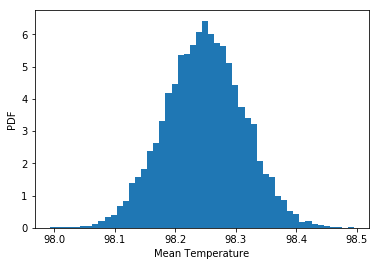

In [250]:
#Calculate temperature mean
temp_mean = df['temperature'].mean()
print('Mean Temperature:  ', temp_mean)

# Compute and print SEM
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print('The standard error of the mean:  ', sem)


lower = temp_mean - 3*sem
upper = temp_mean + 3*sem

print('Extreme values are those less than:  ', lower, ' and ', 'higher than:  ', upper)
print('  ')

#Use bootstrap techniques to generate many random samples from our data
#and compute confidence intervals.

def bootstrap_replicate_1d(data, func):
    '''This function generates bootstrap replicates of 1d data'''
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    '''Draw bootstrap replicates.'''

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)
conf_int = np.percentile(bs_replicates,[0.5,99.5])


print('99% confidence interval =', conf_int)

#Create a pdf histogram of results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('Mean Temperature')
_ = plt.ylabel('PDF')


**CONCLUSION:**  The standard error of the mean is the standard deviation of the sampling distribution of the mean. We would consider anything outside 3 sigmas to be extreme. The values are below 98.057 and above 98.44.

Another way of determining extreme values is to look at the 99% confidence interval. Values below 98.08 and above 98.41 are considered extreme. These two methods produced extreme values that are very close.

## Question 6. Is there a significant difference between males and females in normal temperature?


In [251]:
df.groupby('gender').mean()
               

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


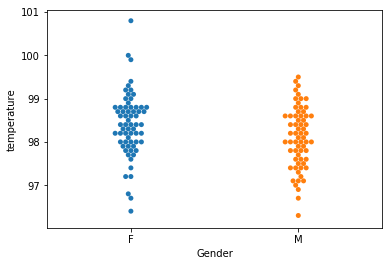

In [252]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='gender', y='temperature', data=df)


# Label the axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('temperature')

# Show the plot
plt.show()

It looks as if these are two independent distributions (I tested independence for them earlier) so I can use a two sample t-test that compares the means of two independent samples of scores.

The null hypothesis is that the sample mean for females does not differ from the sample mean for males:

H0: mean(F) = mean(M)

The alternative hypothesis is that our sample mean is not equal to 98.6 or,

H1: mean(F) ≠ mean(M)

In [253]:
stats.ttest_ind(df[df['gender']=='F']['temperature'], 
                df[df['gender']=='M']['temperature'], axis=0, equal_var=False)

Ttest_indResult(statistic=2.285434538165611, pvalue=0.023938264182934196)

**CONCLUSION:**  The p-value is less than 0.05 which allows us to reject the null hypothesis and conclude that the mean temperature is different for females and males.

## Final Thoughts

The purpose of this investigation was to determine if the mean normal body temperature of 98.6, that was determined by Carl Wunderlich in 1868, is statistically valid. I have shown that indeed it is not statistically valid (p < 0.001) and furthermore both male and female mean temperatures are below 98.6. Female mean temperatures are slightly higher than male mean temperature at p < 0.05. 

